# Support Vector Machine

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/KernelFunctions.jl/blob/master/examples/support-vector-machine/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelFunctions.jl/dev/examples/support-vector-machine/).*

!!! warning
    This example is under construction

In [1]:
using KernelFunctions
using Distributions
using Plots

using LinearAlgebra
using Random

# Set plotting theme
theme(:wong)

# Set seed
Random.seed!(1234);

Number of samples:

In [2]:
N = 100;

Select randomly between two classes:

In [3]:
y = rand([-1, 1], N);

Random attributes for both classes:

In [4]:
X = Matrix{Float64}(undef, 2, N)
rand!(MvNormal(randn(2), I), view(X, :, y .== 1))
rand!(MvNormal(randn(2), I), view(X, :, y .== -1));

Create a 2D grid:

In [5]:
xgrid = range(floor(Int, minimum(X)), ceil(Int, maximum(X)); length=100)
Xgrid = ColVecs(mapreduce(collect, hcat, Iterators.product(xgrid, xgrid)));

Create kernel function:

In [6]:
k = SqExponentialKernel() ∘ ScaleTransform(2.0)

Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Scale Transform (s = 2.0)

Optimal prediction:

In [7]:
f(x, X, k, λ) = kernelmatrix(k, x, X) / (kernelmatrix(k, X) + exp(λ) * I) * y

f (generic function with 1 method)

Compute prediction on a grid:

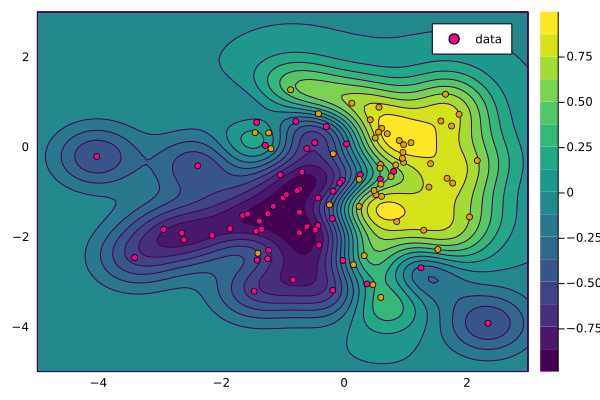

In [8]:
contourf(xgrid, xgrid, f(Xgrid, ColVecs(X), k, 0.1))
scatter!(X[1, :], X[2, :]; color=y, lab="data", widen=false)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*